In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

<IPython.core.display.Javascript object>

In [62]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


<IPython.core.display.Javascript object>

In [3]:
df1 = pd.read_csv("diamonds.csv")

<IPython.core.display.Javascript object>

In [4]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<IPython.core.display.Javascript object>

In [5]:
df1["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

<IPython.core.display.Javascript object>

In [27]:
df1.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<IPython.core.display.Javascript object>

In [28]:
df1.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<IPython.core.display.Javascript object>

In [31]:
df1 = pd.get_dummies(
    df1, prefix=["color", "clarity"], columns=["color", "clarity"], drop_first=True
)
df1.head()

,Unnamed: 0,carat,cut,depth,table,price,x,y,z,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,1,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,0,...,0,1,0,0,0,0,0,1,0,0
4,5,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,0,...,0,0,1,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [32]:
df2 = df1.drop(["Unnamed: 0"], axis=1)

<IPython.core.display.Javascript object>

In [33]:
df2.head()

,carat,cut,depth,table,price,x,y,z,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,0,1,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  object 
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   color_E       53940 non-null  uint8  
 9   color_F       53940 non-null  uint8  
 10  color_G       53940 non-null  uint8  
 11  color_H       53940 non-null  uint8  
 12  color_I       53940 non-null  uint8  
 13  color_J       53940 non-null  uint8  
 14  clarity_IF    53940 non-null  uint8  
 15  clarity_SI1   53940 non-null  uint8  
 16  clarity_SI2   53940 non-null  uint8  
 17  clarity_VS1   53940 non-null  uint8  
 18  clarity_VS2   53940 non-nu

<IPython.core.display.Javascript object>

In [35]:
X = df2.drop("cut", axis=1)
y = df2.cut

<IPython.core.display.Javascript object>

In [36]:
freq = pd.DataFrame(
    {
        "counts": y.value_counts().values,
        "%age": np.round((y.value_counts() / 53940) * 100, 2),
    },
    index=y.value_counts().index,
)

<IPython.core.display.Javascript object>

In [37]:
freq

,counts,%age
Ideal,21551,39.95
Good,16988,31.49
Premium,13791,25.57
Fair,1610,2.98


<IPython.core.display.Javascript object>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, stratify=y)

<IPython.core.display.Javascript object>

In [64]:
train_freq = pd.DataFrame(
    {
        "counts": y_train.value_counts().values,
        "%age": np.round((y_train.value_counts() / len(y_train)) * 100, 2),
    },
    index=y_train.value_counts().index,
)
train_freq

,counts,%age
Ideal,16163,39.95
Good,12741,31.49
Premium,10343,25.57
Fair,1208,2.99


<IPython.core.display.Javascript object>

In [65]:
test_freq = pd.DataFrame(
    {
        "counts": y_test.value_counts().values,
        "%age": np.round((y_test.value_counts() / len(y_test)) * 100, 2),
    },
    index=y_test.value_counts().index,
)
test_freq

,counts,%age
Ideal,5388,39.96
Good,4247,31.49
Premium,3448,25.57
Fair,402,2.98


<IPython.core.display.Javascript object>

# Example
- class: fair
- Reduce FN
- Recall is more imp

- macro average recall


## Model Selection

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

<IPython.core.display.Javascript object>

In [124]:
from sklearn.model_selection import cross_val_score

<IPython.core.display.Javascript object>

In [126]:
clf1 = DecisionTreeClassifier(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = BaggingClassifier(random_state=1)
clf4 = GradientBoostingClassifier(random_state=1)
clf5 = LogisticRegression(random_state=1)
clf6 = AdaBoostClassifier(random_state=1)


models = [clf1, clf2, clf3, clf4, clf5, clf6]

<IPython.core.display.Javascript object>

In [127]:
for model in models:
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="recall_macro")
    print(model, "---------->", np.round((score.mean()) * 100, 2), "%")

DecisionTreeClassifier(random_state=1) ----------> 75.61 %
RandomForestClassifier(random_state=1) ----------> 80.13 %
BaggingClassifier(random_state=1) ----------> 81.48 %
GradientBoostingClassifier(random_state=1) ----------> 81.05 %
LogisticRegression(random_state=1) ----------> 35.96 %
AdaBoostClassifier(random_state=1) ----------> 68.2 %


<IPython.core.display.Javascript object>

## Hyperparameter Tuning

In [128]:
parameters = {
    "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
    "penalty": ["l1", "l2", "none"],
    "multi_class": ["ovr", "multinomial"],
}

<IPython.core.display.Javascript object>

In [129]:
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [130]:
grid_cls = GridSearchCV(
    LogisticRegression(random_state=4),
    parameters,
    scoring="recall_macro",
    n_jobs=-1,
    verbose=1,
    cv=5,
)
grid_cls.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=4), n_jobs=-1,
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro', verbose=1)

<IPython.core.display.Javascript object>

In [131]:
df_tuning = pd.DataFrame.from_dict(grid_cls.cv_results_)
df_tuning

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_multi_class,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,106.171291,6.260526,0.105719,0.016171,ovr,l1,liblinear,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",0.515041,0.529595,0.528567,0.502735,0.533309,0.521849,0.011386,5
1,0.018350,0.004531,0.000000,0.000000,ovr,l1,newton-cg,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
2,0.018950,0.003453,0.000000,0.000000,ovr,l1,lbfgs,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
3,0.016158,0.000977,0.000000,0.000000,ovr,l1,sag,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
4,18.973250,0.504966,0.073604,0.003478,ovr,l1,saga,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",0.262993,0.263333,0.265425,0.260624,0.261808,0.262836,0.001608,18
5,2.044733,0.180142,0.073601,0.002128,ovr,l2,liblinear,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.455701,0.422800,0.443587,0.412457,0.399409,0.426791,0.020440,6
6,34.303878,1.368334,0.079986,0.009878,ovr,l2,newton-cg,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.587375,0.601050,0.590680,0.581334,0.580308,0.588149,0.007502,3
7,2.552175,0.441346,0.076993,0.007761,ovr,l2,lbfgs,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.412062,0.391461,0.379185,0.397023,0.383064,0.392559,0.011580,8
8,12.362533,1.873688,0.075199,0.004951,ovr,l2,sag,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.264415,0.264037,0.267097,0.261901,0.263195,0.264129,0.001717,13
9,13.487529,1.604578,0.079783,0.015774,ovr,l2,saga,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.262993,0.263333,0.265425,0.260624,0.261808,0.262836,0.001608,18


<IPython.core.display.Javascript object>

In [132]:
df_tuning[
    [
        "params",
        "split0_test_score",
        "split1_test_score",
        "split2_test_score",
        "split3_test_score",
        "split4_test_score",
        "mean_test_score",
        "rank_test_score",
    ]
]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",0.515041,0.529595,0.528567,0.502735,0.533309,0.521849,5
1,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",NaN,NaN,NaN,NaN,NaN,NaN,29
2,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",NaN,NaN,NaN,NaN,NaN,NaN,28
3,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",NaN,NaN,NaN,NaN,NaN,NaN,26
4,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve...",0.262993,0.263333,0.265425,0.260624,0.261808,0.262836,18
5,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.455701,0.422800,0.443587,0.412457,0.399409,0.426791,6
6,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.587375,0.601050,0.590680,0.581334,0.580308,0.588149,3
7,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.412062,0.391461,0.379185,0.397023,0.383064,0.392559,8
8,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.264415,0.264037,0.267097,0.261901,0.263195,0.264129,13
9,"{'multi_class': 'ovr', 'penalty': 'l2', 'solve...",0.262993,0.263333,0.265425,0.260624,0.261808,0.262836,18


<IPython.core.display.Javascript object>

In [133]:
grid_cls.best_params_

{'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg'}

<IPython.core.display.Javascript object>

In [135]:
grid_cls.best_score_

0.597924473324292

<IPython.core.display.Javascript object>

In [134]:
df_tuning[df_tuning["params"] == grid_cls.best_params_]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_multi_class,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,34.456441,3.108085,0.087166,0.020142,ovr,none,newton-cg,"{'multi_class': 'ovr', 'penalty': 'none', 'sol...",0.603994,0.601762,0.599934,0.596671,0.587261,0.597924,0.005846,1


<IPython.core.display.Javascript object>

## Model Building

In [136]:
multiclass_clf = LogisticRegression(
    multi_class="ovr", penalty="none", solver="newton-cg", random_state=4
)
multiclass_clf.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', penalty='none', random_state=4,
                   solver='newton-cg')

<IPython.core.display.Javascript object>

In [137]:
y_pred = multiclass_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 120,  120,   52,  110],
       [   7, 2408, 1271,  561],
       [   1,  522, 4654,  211],
       [   2,  817,  433, 2196]], dtype=int64)

<IPython.core.display.Javascript object>

In [138]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=multiclass_clf.classes_,
    columns=multiclass_clf.classes_,
)
cm

,Fair,Good,Ideal,Premium
Fair,120,120,52,110
Good,7,2408,1271,561
Ideal,1,522,4654,211
Premium,2,817,433,2196


<IPython.core.display.Javascript object>

Text(33.0, 0.5, 'True values')

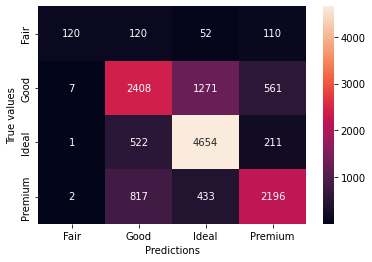

<IPython.core.display.Javascript object>

In [139]:
sns.heatmap(cm, annot=True, fmt=".4g")
plt.xlabel("Predictions")
plt.ylabel("True values")

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fair       0.92      0.30      0.45       402
        Good       0.62      0.57      0.59      4247
       Ideal       0.73      0.86      0.79      5388
     Premium       0.71      0.64      0.67      3448

    accuracy                           0.70     13485
   macro avg       0.75      0.59      0.63     13485
weighted avg       0.70      0.70      0.69     13485



<IPython.core.display.Javascript object>